# The Dynamics of MLB Game Attendance: An In-depth Analysis Using Machine Learning Approaches

## Evaluating and Comparing Predictive Models for Attendance at Major League Baseball Games

This data set is made available by http://www.baseball-reference.com. It contains data about professional baseball (MLB) games played in the 2016 season. There are 2,427 games in the data set. Each row represents a single game. The goal is to predict the attendance at a home team’s game. This is an important task because most franchises want to predict the number of attendees for a variety of reasons including profits.

## Description of Variables

The description of variables are provided in "Baseball - Data Dictionary.docx"

## Goal

Use the **baseball.csv** data set and build a model to predict **attendance_binary**.

# Section 1: (6 points in total)

From the problem description, it appears to be a binary and predictive classification task.

## Data Prep (5.5 points)

# Get the data

In [1]:
# Common imports
import numpy as np
import pandas as pd

np.random.seed(42)

In [2]:
# Import the data set:

baseball = pd.read_csv("baseball.csv")
baseball

,attendance_binary,previous_attendance,previous_away_team_errors,previous_away_team_hits,previous_away_team_runs,game_type,previous_game_type,previous_home_team_errors,previous_home_team_hits,previous_home_team_runs,game_day,previous_game_day,temperature,wind_speed,sky,previous_game_duration,previous_homewin
0,0,43683,2,6,2,Night Game,Day Game,0,6,6,Wednesday,Monday,55,24,Overcast,2.933333,1
1,0,45785,0,7,2,Night Game,Day Game,0,10,3,Wednesday,Monday,48,7,Unknown,2.800000,1
2,0,48282,0,8,4,Night Game,Day Game,2,4,3,Wednesday,Monday,65,10,Cloudy,3.383333,0
3,0,21830,0,9,6,Day Game,Night Game,0,15,11,Wednesday,Tuesday,77,0,In Dome,3.233333,1
4,0,49289,2,4,2,Night Game,Day Game,1,1,3,Tuesday,Monday,81,12,Cloudy,2.633333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,1,44020,0,11,9,Night Game,Night Game,1,3,0,Tuesday,Monday,76,8,Unknown,3.133333,0
2423,0,31042,2,7,5,Night Game,Day Game,1,7,3,Monday,Sunday,72,0,In Dome,2.850000,0
2424,0,24123,0,7,2,Day Game,Night Game,0,6,1,Wednesday,Tuesday,66,0,In Dome,2.483333,0
2425,0,36911,1,12,8,Day Game,Night Game,2,10,7,Wednesday,Tuesday,71,0,In Dome,3.783333,0


# Split the data into train and test

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(baseball, test_size=0.3)

## Drop the variables we can't use for the binary task

There are no variables to be removed from the dataset; however, we will still create the train and test subsets and leave the list empty in case a variable needs to be removed in the future.

In [4]:
# We can't use the following columns in this tutorial, because they are not for binary classification tasks
train = train_set.drop([], axis=1)
test = test_set.drop([], axis=1)

## Check the missing values

In [5]:
train_set.isna().sum()

attendance_binary            0
previous_attendance          0
previous_away_team_errors    0
previous_away_team_hits      0
previous_away_team_runs      0
game_type                    0
previous_game_type           0
previous_home_team_errors    0
previous_home_team_hits      0
previous_home_team_runs      0
game_day                     0
previous_game_day            0
temperature                  0
wind_speed                   0
sky                          0
previous_game_duration       0
previous_homewin             0
dtype: int64

In [6]:
test_set.isna().sum()

attendance_binary            0
previous_attendance          0
previous_away_team_errors    0
previous_away_team_hits      0
previous_away_team_runs      0
game_type                    0
previous_game_type           0
previous_home_team_errors    0
previous_home_team_hits      0
previous_home_team_runs      0
game_day                     0
previous_game_day            0
temperature                  0
wind_speed                   0
sky                          0
previous_game_duration       0
previous_homewin             0
dtype: int64

#### Apparently there is No missing values with the current data

# Data Prep

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

## Separate the target variable (we don't want to transform it)

In [8]:
train_y = train[['attendance_binary']]
test_y = test[['attendance_binary']]

train_inputs = train.drop(['attendance_binary'], axis=1)
test_inputs = test.drop(['attendance_binary'], axis=1)

##  Identify the numerical and categorical columns

In [9]:
train_inputs.dtypes

previous_attendance            int64
previous_away_team_errors      int64
previous_away_team_hits        int64
previous_away_team_runs        int64
game_type                     object
previous_game_type            object
previous_home_team_errors      int64
previous_home_team_hits        int64
previous_home_team_runs        int64
game_day                      object
previous_game_day             object
temperature                    int64
wind_speed                     int64
sky                           object
previous_game_duration       float64
previous_homewin               int64
dtype: object

In [10]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

In [11]:
# Identify the binary columns so we can pass them through without transforming
binary_columns = ['previous_homewin']

In [12]:
# Be careful: numerical columns already includes the binary columns,
# So, we need to remove the binary columns from numerical columns.

for col in binary_columns:
    numeric_columns.remove(col)

In [13]:
binary_columns

['previous_homewin']

In [14]:
categorical_columns

['game_type', 'previous_game_type', 'game_day', 'previous_game_day', 'sky']

In [15]:
numeric_columns

['previous_attendance',
 'previous_away_team_errors',
 'previous_away_team_hits',
 'previous_away_team_runs',
 'previous_home_team_errors',
 'previous_home_team_hits',
 'previous_home_team_runs',
 'temperature',
 'wind_speed',
 'previous_game_duration']

# Pipeline

Due to the lack of missing values, the pipeline won't make any changes, however, we'll leave it as is if a new version of the dataset contains missing values that need to be imputed or filled.

In [16]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [17]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [18]:
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

In [19]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('binary', binary_transformer, binary_columns)],
        remainder='passthrough')


# Transform: fit_transform() for TRAIN

In [20]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_inputs)

train_x

array([[-1.12371621,  0.57666325, -0.20719118, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.05787587, -0.72716391, -0.78017264, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.38394295,  0.57666325, -1.35315411, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.52534761,  0.57666325, -0.78017264, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.94392488, -0.72716391,  0.65228102, ...,  0.        ,
         0.        ,  0.        ],
       [-0.98407336,  1.88049041, -0.49368191, ...,  1.        ,
         0.        ,  1.        ]])

In [21]:
train_x.shape

(1698, 37)

# Tranform: transform() for TEST

In [22]:
# Transform the test data
test_x = preprocessor.transform(test_inputs)

test_x

array([[ 0.0814842 ,  1.88049041, -1.06666338, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.17001331, -0.72716391, -1.63964484, ...,  0.        ,
         0.        ,  0.        ],
       [-0.29905768, -0.72716391, -0.20719118, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.49582715, -0.72716391,  1.22526249, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26445059, -0.72716391, -0.20719118, ...,  0.        ,
         0.        ,  1.        ],
       [-1.71775245, -0.72716391, -1.63964484, ...,  0.        ,
         0.        ,  0.        ]])

In [23]:
test_x.shape

(729, 37)

# SVM - Binary classification

## Find the Baseline (0.5 point)

In [24]:
# Sci-kit Learn's DummyClassifier automates the entire process performed manually above.
# First, you instantiate it with the "most_frequent" strategy. 
# Then, you fit the model. This finds the most frequently (i.e., majority) class (in the training set).

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(train_x, train_y)

DummyClassifier(strategy='most_frequent')

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
# Then, you call the predict function of the classifier.
# This predicts all values as the majority class.
# In the next step, you compare the predicted values with the actual values to calculate accuracy
# # This is the baseline Train Accuracy

dummy_train_pred = dummy_clf.predict(train_x)

baseline_train_acc = accuracy_score(train_y, dummy_train_pred)

print('Baseline Train Accuracy: {}' .format(baseline_train_acc))

Baseline Train Accuracy: 0.5141342756183745


In [27]:
# We repeat the same steps for the test set
# This is the baseline Test Accuracy

dummy_test_pred = dummy_clf.predict(test_x)

baseline_test_acc = accuracy_score(test_y, dummy_test_pred)

print('Baseline Test Accuracy: {}' .format(baseline_test_acc))

Baseline Test Accuracy: 0.5294924554183813


#### The result shows that any model that beats 52.9% of accuracy can be considered a "good model" since this is the worst case scenario (baseline).

# Section 2: (3 points in total)

Build three different SVM models (by changing the kernels, regularization, etc.). Generate their training and test values. Each model is worth 1 point. 

(Add cells as needed)

## SVM Model 1: Linear Kernel

In [28]:
from sklearn.svm import SVC
 
lin_svm = SVC(kernel="linear")

lin_svm.fit(train_x, train_y)

/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

#### Accuracy of the SVM Linear Kernel model:

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
#Predict the train values
train_y_pred = lin_svm.predict(train_x)

model_1_train_acc = accuracy_score(train_y, train_y_pred)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.8445229681978799

In [31]:
#Predict the test values
test_y_pred = lin_svm.predict(test_x)

model_1_test_acc = accuracy_score(test_y, test_y_pred)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.8175582990397805

#### This model seems to be promising since the gap between the train and test accuracy is small ~3%. 

### Performing Cross-validation in Model 1: Lineal Kernel

In [32]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lin_svm, train_x, 
                        train_y, cv=5, scoring="accuracy",
                        return_estimator=True)

/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

In [33]:
cross_val_model1 = scores['test_score']

In [34]:
def displaying_metrics(scores_):
    mean_scores = np.mean(scores_)
    sqrt_scores = np.mean(np.sqrt(scores_))
    variance_scores = np.var(scores_)

    print("Mean is: ", mean_scores, "Sqrt: ", sqrt_scores, "Variance: ", variance_scores)

In [35]:
displaying_metrics(cross_val_model1)

Mean is:  0.8404008328995316 Sqrt:  0.9167302057186539 Variance:  2.2059312055168496e-05


## SVM Model 2: Polynomial Kernel

In [36]:
from sklearn.svm import SVC

# You need to enter a value for gamma. Remember, gamma controls the shape of the bell curve for rbf
# You can also set it is as gamma='scale'. This will be the default option in future releases

pol_svm = SVC(kernel="poly", degree=2, coef0=1, C=0.1)

pol_svm.fit(train_x, train_y)

/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, coef0=1, degree=2, kernel='poly')

In [37]:
#Predict the train values
train_y_pred = pol_svm.predict(train_x)

model_2_train_acc = accuracy_score(train_y, train_y_pred)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.8462897526501767

In [38]:
#Predict the test values
test_y_pred = pol_svm.predict(test_x)

model_2_test_acc = accuracy_score(test_y, test_y_pred)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.8106995884773662

##### The Polynomial Kernel model seems to have similar results as the Linear Kernel model ~3% accuracy gap training/testing

### Performing Cross-validation in Model 2: Polynomial Kernel

In [39]:
from sklearn.model_selection import cross_validate
scores = cross_validate(pol_svm, train_x, 
                        train_y, cv=5, scoring="accuracy",
                        return_estimator=True)

/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

In [40]:
cross_val_model2 = scores['test_score']

In [41]:
displaying_metrics(cross_val_model2)

Mean is:  0.8280357452715599 Sqrt:  0.9099622158233682 Variance:  1.4966249268453523e-05


## SVM Model 3 with Radial basis function kernel (similarity features)

In [42]:
rbf_svm = SVC(kernel="rbf", C=0.1, gamma='scale')

rbf_svm.fit(train_x, train_y)

/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1)

In [43]:
#Predict the train values
train_y_pred = rbf_svm.predict(train_x)

model_3_train_acc = accuracy_score(train_y, train_y_pred)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.8445229681978799

In [44]:
#Predict the test values
test_y_pred = rbf_svm.predict(test_x)

model_3_test_acc = accuracy_score(test_y, test_y_pred)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.8161865569272977

##### It seems that the three previous models performs similarly; the difference in accuracy of train-vs-test is still ~3%.

### Performing Cross-validation in Model 3: RBF Kernel

In [45]:
from sklearn.model_selection import cross_validate
scores = cross_validate(rbf_svm, train_x, 
                        train_y, cv=5, scoring="accuracy",
                        return_estimator=True)

/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

In [46]:
cross_val_model3 = scores['test_score']

In [47]:
displaying_metrics(cross_val_model3)

Mean is:  0.823926774249523 Sqrt:  0.9076771694086281 Variance:  0.00016232334600007567


# Section 3: (3 points in total)

Build two different SGD models (by changing the penalty, etc. or adding polynomial terms) and one LogisticRregression model. Generate their training and test values. Each model is worth 1 point.

(Add cells as needed)

## SGD Model 1:

In [48]:
from sklearn.linear_model import SGDClassifier 

# tol = stopping criterion
# eta0 = learning rate
# penalty = regularization term
# max_iter = number of passes over training data (i.e., epochs)

sgd_logreg = SGDClassifier(max_iter=150, penalty=None, eta0=1) 

sgd_logreg.fit(train_x, train_y)

/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(eta0=1, max_iter=150, penalty=None)

In [49]:
#Predict the train values
train_y_pred = sgd_logreg.predict(train_x)

model_4_train_acc = accuracy_score(train_y, train_y_pred)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.8209658421672555

In [50]:
#Predict the test values
test_y_pred = sgd_logreg.predict(test_x)

model_4_test_acc = accuracy_score(test_y, test_y_pred)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.8189300411522634

### Performing Cross-validation in SGD Model 1: Without Penalty

In [51]:
from sklearn.model_selection import cross_validate
scores = cross_validate(sgd_logreg, train_x, 
                        train_y, cv=5, scoring="accuracy",
                        return_estimator=True)


/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

In [52]:
cross_val_model4 = scores['test_score']

In [53]:
displaying_metrics(cross_val_model4)

Mean is:  0.810341835849384 Sqrt:  0.9001349794618282 Variance:  0.0003197735444499277


## SGD Model 2:

In [54]:
from sklearn.linear_model import SGDClassifier 

# tol = stopping criterion
# eta0 = learning rate
# penalty = regularization term
# max_iter = number of passes over training data (i.e., epochs)

sgd_logreg2 = SGDClassifier(loss="perceptron", eta0=0.1, learning_rate="constant", penalty=None, max_iter=100, tol=0.02) 

sgd_logreg2.fit(train_x, train_y)

/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(eta0=0.1, learning_rate='constant', loss='perceptron',
              max_iter=100, penalty=None, tol=0.02)

In [55]:
#Predict the train values
train_y_pred = sgd_logreg2.predict(train_x)

model_5_train_acc = accuracy_score(train_y, train_y_pred)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.7891637220259128

In [56]:
#Predict the test values
test_y_pred = sgd_logreg2.predict(test_x)

model_5_test_acc = accuracy_score(test_y, test_y_pred)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.7695473251028807

### Performing Cross-validation in SGD Model 2: With modified parameters

In [57]:
scores = cross_validate(sgd_logreg2, train_x, 
                        train_y, cv=5, scoring="accuracy",
                        return_estimator=True)

/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

In [58]:
cross_val_model5 = scores['test_score']

In [59]:
displaying_metrics(cross_val_model5)

Mean is:  0.7449574874197467 Sqrt:  0.862636900583983 Variance:  0.0024005494612531915


## LogisticRegression Model:

Since this dataset can be consider (small) due to the number of observations (2427), we can use solver='liblinear'.

In [60]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', penalty='l2')

log_reg.fit(train_x, train_y)

/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [61]:
log_reg.predict(test_x)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [62]:
# Create a new DataFrame

predictions = pd.DataFrame(log_reg.predict(test_x), columns=['Predicted'])

predictions

,Predicted
0,1
1,1
2,1
3,1
4,1
...,...
724,1
725,1
726,0
727,1


In [63]:
# Add the actual to the same DataFrame

predictions['Actual'] = np.array(test_y)

predictions

,Predicted,Actual
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
724,1,0
725,1,1
726,0,0
727,1,0


In [64]:
#Predict the train values
train_y_pred = log_reg.predict(train_x)

model_6_train_acc = accuracy_score(train_y, train_y_pred)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.8433451118963486

In [65]:
#Predict the test values
test_y_pred = log_reg.predict(test_x)

model_6_test_acc = accuracy_score(test_y, test_y_pred)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.813443072702332

By apliying Logistic Regression, we can observe that the model keeps giving a very close values of the difference in accuracy train/test ~3%.

### Performing Cross-validation in Logistic Regression Model 3: With modified parameters

In [66]:
scores = cross_validate(log_reg, train_x, 
                        train_y, cv=5, scoring="accuracy",
                        return_estimator=True)

/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pablozumba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

In [67]:
cross_val_model6 = scores['test_score']

In [68]:
displaying_metrics(cross_val_model6)

Mean is:  0.8351049800451154 Sqrt:  0.9138359465377356 Variance:  2.9572666572905702e-05


# Discussion (3 points in total)


## List the train and test values of each model you built (1 point)

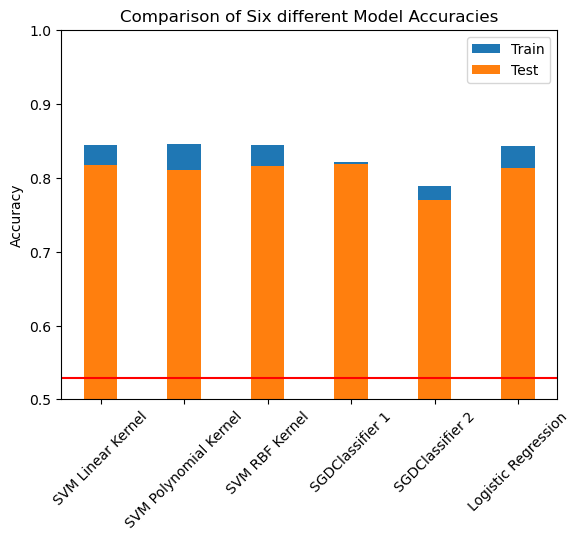

In [69]:
import matplotlib.pyplot as plt

# Define the accuracy values for each model
model_names = ['SVM Linear Kernel', 'SVM Polynomial Kernel', 'SVM RBF Kernel', 'SGDClassifier 1', 'SGDClassifier 2', 'Logistic Regression']
train_accuracies = [model_1_train_acc, model_2_train_acc, model_3_train_acc, model_4_train_acc, model_5_train_acc, model_6_train_acc]
test_accuracies = [model_1_test_acc, model_2_test_acc, model_3_test_acc, model_4_test_acc, model_5_test_acc, model_6_test_acc]

# Create the bar chart
fig, ax = plt.subplots()
bar_width = 0.40
bar1 = ax.bar(model_names, train_accuracies, bar_width, label='Train')
bar2 = ax.bar(model_names, test_accuracies, bar_width, label='Test')
#plt.xticks(model_names, model_names, rotation=45)

# Add labels and title
plt.title('Comparison of Six different Model Accuracies')
ax.set_ylabel('Accuracy')
plt.ylim(0.5, 1)
ax.legend()

#Define the Baseline test accuracy as reference
ax.axhline(y = baseline_test_acc, color = 'r', linestyle = '-')

#Make the X axis more readable
plt.xticks(model_names, model_names, rotation=45)

# Show the chart
plt.show()

### Listing train and test values for each model

In [70]:
df = pd.DataFrame([train_accuracies, test_accuracies], columns=model_names)
print(df)

   SVM Linear Kernel  SVM Polynomial Kernel  SVM RBF Kernel  SGDClassifier 1  \
0           0.844523                0.84629        0.844523         0.820966   
1           0.817558                0.81070        0.816187         0.818930   

   SGDClassifier 2  Logistic Regression  
0         0.789164             0.843345  
1         0.769547             0.813443  


## Which model performs the best and why? (0.5 points) How does it compare to baseline? (0.5 points)

Hint: The best model is the one that has the highest TEST score (regardless of any of the training values). If you select your model based on TRAIN values, you will lose points.

#### - According to the accuracy test scores, model 4 (SGDClassifier 1) performed the best of the six models. I think this model performs better in terms of accuracy and overfitting because by using Stochastic Gradient Descent, the model handles very good Sparse Data, i.e data with a lot of zeroes. A linear kernel model (2nd best model) on the other hand is not very efficient with sparse data, as it requires the computation of dot products between the input vectors, which can be very expensive when the number of features is high.

#### - Based on the comparison between the SGDClassifier 1 model and the baseline, the model performs ~30% more accurately than the baseline. Therefore, based on the comparison between models and the difference between baseline and test accuracy, this model appears to be satisfactory.

## Is there any evidence of overfitting in the best model, why or why not? If there is, what did you do about it? (0.5 points)

#### - In order to determine if the best model (SGDClassifier 1) overfits, I used Cross-validation to evaluate its performance. However, overfitting is not always clearly reflected in the accuracy difference between training and test data, and other factors such as high variance, high complexity, and small test sets can also indicate it.

#### - Using cross-validation set cv=5, I observed that the mean accuracy on train versus test is ~1% and the variance is close to 0. Thus, I can conclude that the model is not greatly overfitting and it still performs ~30% better than the baseline.

## Is there any evidence of overfitting in the other models (besides the best model), why or why not? If there is, what did you do about it? (0.5 points)

#### - Ran cross-validation on the rest of the models and found that there was no significant difference between training and test accuracy, which was between 3 and 5%. Addionally, despite reviewing each model's documentation and modifying its parameters to maximize accuracy and minimize overfitting, the percentage difference between training and test accuracy is still around 3 to 5%.